* MEMO: DEC 13 final

base: continue

arch 01 epoch 1000    arch 02 adjust filter start


# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import numpy as np

## Load dataset, Preprocessing

In [4]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [5]:
output_dim = nb_classes = 10

In [6]:
input_dim = (32,32,3)
X_train = X_train.reshape(50000, *input_dim)
X_test = X_test.reshape(10000, *input_dim)

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
print(input_dim, X_train.shape, Y_train.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) 10


## Build Model

In [42]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 16)       

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batch_size=128
epochs=100
history_3 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 378us/sample - loss: 1.9197 - accuracy: 0.3043 - val_loss: 1.6747 - val_accuracy: 0.4021
Epoch 2/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.5220 - accuracy: 0.4529 - val_loss: 1.5336 - val_accuracy: 0.4463
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.4061 - accuracy: 0.4974 - val_loss: 1.4946 - val_accuracy: 0.4629
Epoch 4/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3418 - accuracy: 0.5232 - val_loss: 1.3423 - val_accuracy: 0.5206
Epoch 5/100
50000/50000 [==============================] - 17s 346us/sample - loss: 1.2990 - accuracy: 0.5405 - val_loss: 1.4571 - val_accuracy: 0.4978
Epoch 6/100
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2652 - accuracy: 0.5515 - val_loss: 1.4092 - val_accuracy: 0.5031
Epoch 7/100
50000/50000 [=============

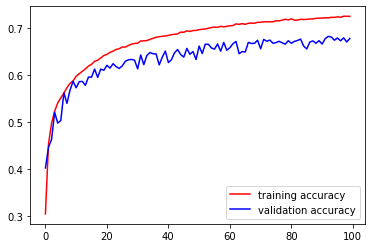

In [46]:
plt.plot(history_3.history['accuracy'],'r')
plt.plot(history_3.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

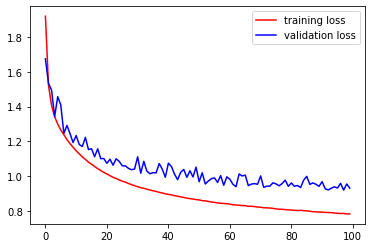

In [47]:
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_3 = model.predict_classes(X_test)

In [38]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions_2)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

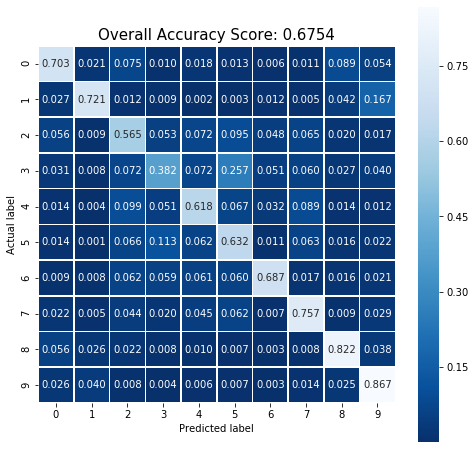

In [40]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('CNN_DEC13_ARCH6.png')
plt.show();

# arch 1 1000 epochs

In [17]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(16,1, activation='relu'))

# 14,14
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 16)        528       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 32)       

In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
batch_size=128
epochs=300
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 33s 659us/sample - loss: 1.8425 - accuracy: 0.3241 - val_loss: 1.6961 - val_accuracy: 0.3714
Epoch 2/300
50000/50000 [==============================] - 28s 564us/sample - loss: 1.4983 - accuracy: 0.4498 - val_loss: 1.4645 - val_accuracy: 0.4700
Epoch 3/300
50000/50000 [==============================] - 28s 556us/sample - loss: 1.3620 - accuracy: 0.5077 - val_loss: 1.3746 - val_accuracy: 0.5091
Epoch 4/300
50000/50000 [==============================] - 28s 554us/sample - loss: 1.2785 - accuracy: 0.5412 - val_loss: 1.3632 - val_accuracy: 0.5146
Epoch 5/300
50000/50000 [==============================] - 28s 554us/sample - loss: 1.2131 - accuracy: 0.5681 - val_loss: 1.3270 - val_accuracy: 0.5301
Epoch 6/300
50000/50000 [==============================] - 28s 553us/sample - loss: 1.1546 - accuracy: 0.5909 - val_loss: 1.1791 - val_accuracy: 0.5802
Epoch 7/300
50000/50000 [=============

50000/50000 [==============================] - 27s 543us/sample - loss: 0.5805 - accuracy: 0.7949 - val_loss: 1.0048 - val_accuracy: 0.6778
Epoch 108/300
50000/50000 [==============================] - 27s 542us/sample - loss: 0.5755 - accuracy: 0.7968 - val_loss: 0.9637 - val_accuracy: 0.6893
Epoch 109/300
50000/50000 [==============================] - 27s 542us/sample - loss: 0.5735 - accuracy: 0.7964 - val_loss: 0.9509 - val_accuracy: 0.6919
Epoch 110/300
50000/50000 [==============================] - 27s 542us/sample - loss: 0.5724 - accuracy: 0.7984 - val_loss: 1.0011 - val_accuracy: 0.6812
Epoch 111/300
50000/50000 [==============================] - 27s 543us/sample - loss: 0.5715 - accuracy: 0.7978 - val_loss: 0.9506 - val_accuracy: 0.6951
Epoch 112/300
50000/50000 [==============================] - 27s 543us/sample - loss: 0.5718 - accuracy: 0.7980 - val_loss: 0.9555 - val_accuracy: 0.6918
Epoch 113/300
50000/50000 [==============================] - 27s 543us/sample - loss: 0.56

50000/50000 [==============================] - 27s 549us/sample - loss: 0.4946 - accuracy: 0.8225 - val_loss: 1.0714 - val_accuracy: 0.6793
Epoch 214/300
50000/50000 [==============================] - 27s 549us/sample - loss: 0.4934 - accuracy: 0.8234 - val_loss: 1.0622 - val_accuracy: 0.6850
Epoch 215/300
50000/50000 [==============================] - 27s 549us/sample - loss: 0.4938 - accuracy: 0.8235 - val_loss: 1.0817 - val_accuracy: 0.6849
Epoch 216/300
50000/50000 [==============================] - 27s 550us/sample - loss: 0.4931 - accuracy: 0.8241 - val_loss: 1.0660 - val_accuracy: 0.6849
Epoch 217/300
50000/50000 [==============================] - 27s 549us/sample - loss: 0.4945 - accuracy: 0.8237 - val_loss: 1.1172 - val_accuracy: 0.6818
Epoch 218/300
50000/50000 [==============================] - 27s 549us/sample - loss: 0.4925 - accuracy: 0.8231 - val_loss: 1.0896 - val_accuracy: 0.6804
Epoch 219/300
50000/50000 [==============================] - 27s 549us/sample - loss: 0.49

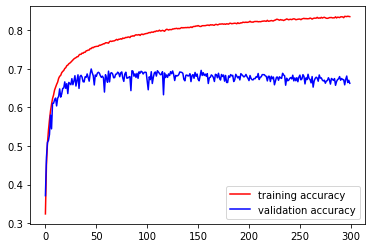

In [21]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

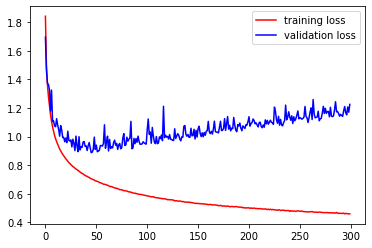

In [22]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [23]:
predictions = model.predict_classes(X_test)

In [24]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

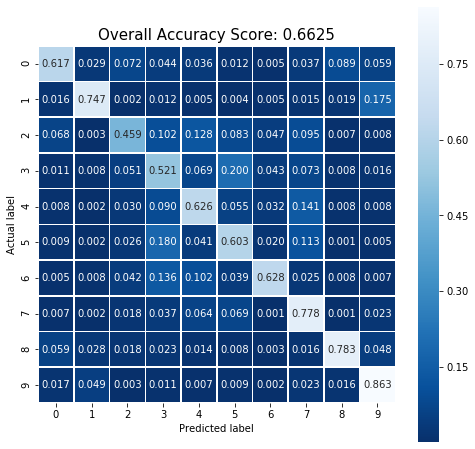

In [25]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('CNN_DEC13_03_ARCH1.png')
plt.show();

# arch 2 model filter

In [26]:
model = Sequential()

# 32,32
model.add(Convolution2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(16,1, activation='relu'))

# 14,14
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 32)       

In [28]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
batch_size=128
epochs=300
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 96s 2ms/sample - loss: 1.7464 - accuracy: 0.3590 - val_loss: 1.5972 - val_accuracy: 0.4223
Epoch 2/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.3857 - accuracy: 0.5002 - val_loss: 1.5096 - val_accuracy: 0.4605
Epoch 3/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.2425 - accuracy: 0.5556 - val_loss: 1.3054 - val_accuracy: 0.5281
Epoch 4/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.1540 - accuracy: 0.5909 - val_loss: 1.2955 - val_accuracy: 0.5319
Epoch 5/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.0928 - accuracy: 0.6121 - val_loss: 1.1838 - val_accuracy: 0.5785
Epoch 6/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.0412 - accuracy: 0.6300 - val_loss: 1.1198 - val_accuracy: 0.6012
Epoch 7/300
50000/50000 [=========================

Epoch 55/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4676 - accuracy: 0.8337 - val_loss: 1.1840 - val_accuracy: 0.6574
Epoch 56/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4673 - accuracy: 0.8342 - val_loss: 0.9737 - val_accuracy: 0.6976
Epoch 57/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4576 - accuracy: 0.8371 - val_loss: 1.1512 - val_accuracy: 0.6667
Epoch 58/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4540 - accuracy: 0.8381 - val_loss: 1.0216 - val_accuracy: 0.6967
Epoch 59/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4510 - accuracy: 0.8394 - val_loss: 1.0139 - val_accuracy: 0.6990
Epoch 60/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4440 - accuracy: 0.8418 - val_loss: 1.0277 - val_accuracy: 0.7031
Epoch 61/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.4383 - ac

Epoch 163/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1363 - accuracy: 0.9498 - val_loss: 2.1009 - val_accuracy: 0.6622
Epoch 164/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1491 - accuracy: 0.9452 - val_loss: 2.0128 - val_accuracy: 0.6828
Epoch 165/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1346 - accuracy: 0.9512 - val_loss: 1.9329 - val_accuracy: 0.6738
Epoch 166/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1402 - accuracy: 0.9479 - val_loss: 2.2248 - val_accuracy: 0.6405
Epoch 167/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1351 - accuracy: 0.9503 - val_loss: 1.9976 - val_accuracy: 0.6690
Epoch 168/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1369 - accuracy: 0.9502 - val_loss: 2.0758 - val_accuracy: 0.6725
Epoch 169/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.12

Epoch 217/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0770 - accuracy: 0.9723 - val_loss: 2.5558 - val_accuracy: 0.6758
Epoch 218/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0770 - accuracy: 0.9723 - val_loss: 2.4200 - val_accuracy: 0.6664
Epoch 219/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0877 - accuracy: 0.9685 - val_loss: 2.7406 - val_accuracy: 0.6538
Epoch 220/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0826 - accuracy: 0.9699 - val_loss: 2.5230 - val_accuracy: 0.6780
Epoch 221/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0644 - accuracy: 0.9772 - val_loss: 2.4140 - val_accuracy: 0.6831
Epoch 222/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0893 - accuracy: 0.9672 - val_loss: 2.5103 - val_accuracy: 0.6764
Epoch 223/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.07

Epoch 271/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0582 - accuracy: 0.9789 - val_loss: 2.7679 - val_accuracy: 0.6658
Epoch 272/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0539 - accuracy: 0.9809 - val_loss: 2.8534 - val_accuracy: 0.6728
Epoch 273/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0634 - accuracy: 0.9768 - val_loss: 2.7620 - val_accuracy: 0.6782
Epoch 274/300
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.0575 - accuracy: 0.9793 - val_loss: 2.8476 - val_accuracy: 0.6761
Epoch 275/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0566 - accuracy: 0.9792 - val_loss: 3.0404 - val_accuracy: 0.6596
Epoch 276/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.0520 - accuracy: 0.9813 - val_loss: 2.8387 - val_accuracy: 0.6704
Epoch 277/300
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.04

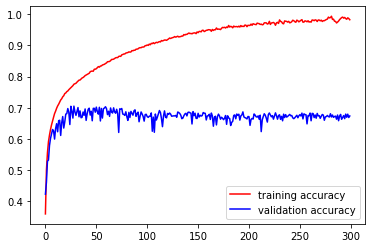

In [30]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

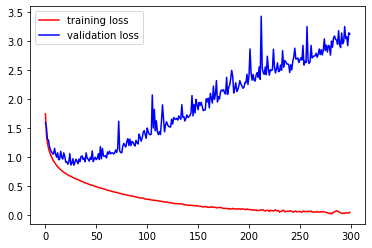

In [31]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [32]:
predictions = model.predict_classes(X_test)

In [33]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

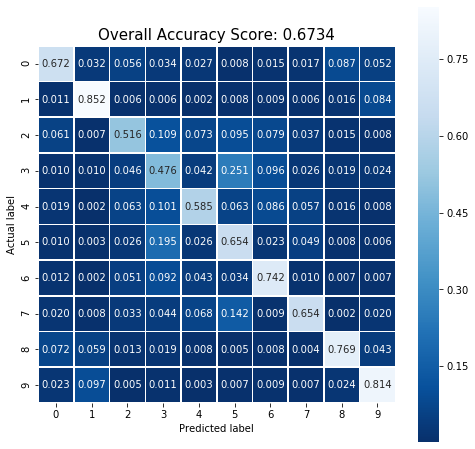

In [34]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('CNN_DEC13_03_ARCH2.png')
plt.show();

# arch 3 model layer

In [35]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 30,30
model.add(MaxPooling2D(pool_size=(2,2)))

# 15,15
model.add(Convolution2D(24,1, activation='relu'))

# 15,15
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

# 13, 13
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))


In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 64)       

In [37]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
batch_size=128
epochs=300
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 230s 5ms/sample - loss: 1.8413 - accuracy: 0.3307 - val_loss: 1.9458 - val_accuracy: 0.3293
Epoch 2/300
50000/50000 [==============================] - 193s 4ms/sample - loss: 1.4712 - accuracy: 0.4640 - val_loss: 1.4408 - val_accuracy: 0.4724
Epoch 3/300
50000/50000 [==============================] - 212s 4ms/sample - loss: 1.3191 - accuracy: 0.5230 - val_loss: 1.3074 - val_accuracy: 0.5250
Epoch 4/300
50000/50000 [==============================] - 264s 5ms/sample - loss: 1.2247 - accuracy: 0.5614 - val_loss: 1.2709 - val_accuracy: 0.5544
Epoch 5/300
50000/50000 [==============================] - 213s 4ms/sample - loss: 1.1551 - accuracy: 0.5892 - val_loss: 1.3132 - val_accuracy: 0.5460
Epoch 6/300
50000/50000 [==============================] - 91s 2ms/sample - loss: 1.1031 - accuracy: 0.6077 - val_loss: 1.1534 - val_accuracy: 0.5930
Epoch 7/300
50000/50000 [====================

50000/50000 [==============================] - 33s 664us/sample - loss: 0.4048 - accuracy: 0.8549 - val_loss: 1.2499 - val_accuracy: 0.6592
Epoch 108/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.4030 - accuracy: 0.8554 - val_loss: 1.1928 - val_accuracy: 0.6777
Epoch 109/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.3995 - accuracy: 0.8561 - val_loss: 1.1499 - val_accuracy: 0.6862
Epoch 110/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.3981 - accuracy: 0.8566 - val_loss: 1.1647 - val_accuracy: 0.6729
Epoch 111/300
50000/50000 [==============================] - 33s 664us/sample - loss: 0.3971 - accuracy: 0.8582 - val_loss: 1.1740 - val_accuracy: 0.6819
Epoch 112/300
50000/50000 [==============================] - 33s 662us/sample - loss: 0.3949 - accuracy: 0.8574 - val_loss: 1.2240 - val_accuracy: 0.6648
Epoch 113/300
50000/50000 [==============================] - 33s 664us/sample - loss: 0.39

50000/50000 [==============================] - 33s 664us/sample - loss: 0.2767 - accuracy: 0.8978 - val_loss: 1.7112 - val_accuracy: 0.6539
Epoch 214/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.2778 - accuracy: 0.8966 - val_loss: 1.6540 - val_accuracy: 0.6649
Epoch 215/300
50000/50000 [==============================] - 33s 664us/sample - loss: 0.2757 - accuracy: 0.8993 - val_loss: 1.6350 - val_accuracy: 0.6671
Epoch 216/300
50000/50000 [==============================] - 33s 662us/sample - loss: 0.2757 - accuracy: 0.8982 - val_loss: 1.6553 - val_accuracy: 0.6601
Epoch 217/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.2708 - accuracy: 0.9002 - val_loss: 1.7967 - val_accuracy: 0.6443
Epoch 218/300
50000/50000 [==============================] - 33s 662us/sample - loss: 0.2740 - accuracy: 0.8994 - val_loss: 1.6810 - val_accuracy: 0.6590
Epoch 219/300
50000/50000 [==============================] - 33s 663us/sample - loss: 0.27

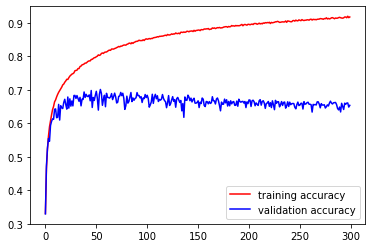

In [39]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

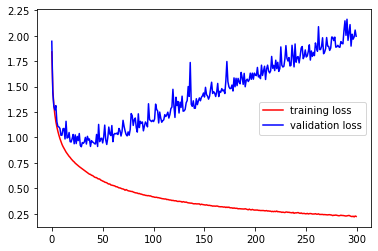

In [40]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [41]:
predictions = model.predict_classes(X_test)

In [42]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

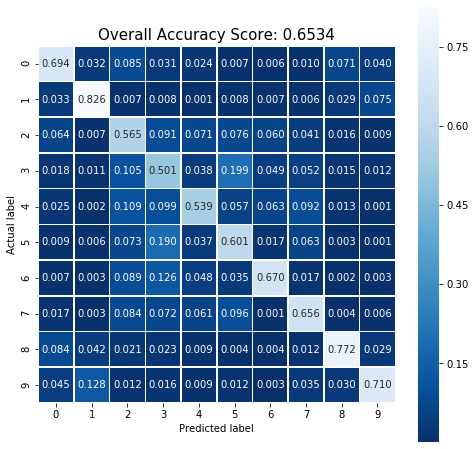

In [43]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
plt.savefig('CNN_DEC13_03_ARCH3.png')
plt.show();

In [42]:
model = Sequential()

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(32,1, activation='relu'))

# 14,14
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(10, 5))

model.add(Flatten())
model.add(Activation('softmax'))
